#### Context

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

#### Attribute Information

- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

#### Source

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations
- Total: 1190 observations
    - Duplicated: 272 observations

Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

#### Citation

fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.
Acknowledgements

#### Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
Donor:
David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score


%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

### Import Dataset

In [2]:
data = pd.read_csv('./data/heart.csv')
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N     0.00       Up             0  
1              N     1.00     Flat             1  
2              N     0.00       Up             0  
3              Y     1.50     Flat             1  
4              N     0.00       Up             0

### Data Info

In [3]:
data.shape

(918, 12)

In [4]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<Axes: >

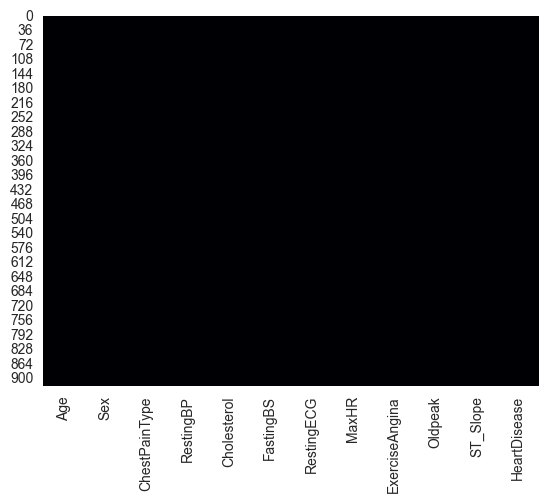

In [6]:
sns.heatmap(data.isnull(), cmap='magma', cbar=False)

- **No null values** present in the data! This dataset is complete.

In [7]:
data.describe().T

count   mean    std   min    25%    50%    75%    max
Age          918.00  53.51   9.43 28.00  47.00  54.00  60.00  77.00
RestingBP    918.00 132.40  18.51  0.00 120.00 130.00 140.00 200.00
Cholesterol  918.00 198.80 109.38  0.00 173.25 223.00 267.00 603.00
FastingBS    918.00   0.23   0.42  0.00   0.00   0.00   0.00   1.00
MaxHR        918.00 136.81  25.46 60.00 120.00 138.00 156.00 202.00
Oldpeak      918.00   0.89   1.07 -2.60   0.00   0.60   1.50   6.20
HeartDisease 918.00   0.55   0.50  0.00   0.00   1.00   1.00   1.00

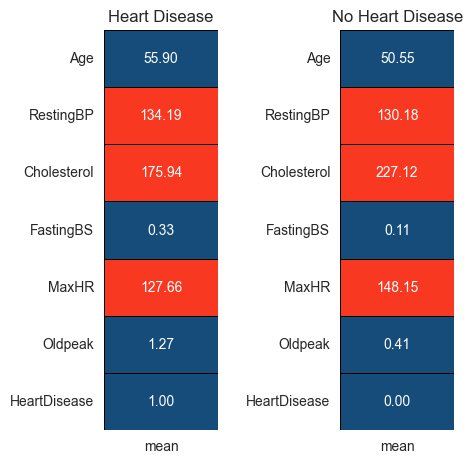

In [8]:
yes = data[data['HeartDisease'] == 1].describe().T
no = data[data['HeartDisease'] == 0].describe().T
colors = ['#154c79', '#F93822']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
plt.subplot(1, 2, 1)
sns.heatmap(yes[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', )
plt.title('Heart Disease')

plt.subplot(1, 2, 2)
sns.heatmap(no[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('No Heart Disease')

fig.tight_layout(pad=2)

- **Mean** values of all the features for cases of heart diseases and non-heart diseases.
- The mean value of `HeartDisease` column is close to 0.5, meaning the dataset is balanced.

### Dividing features into Numerical and Categorical

- Categorical features are defined if the the attribute has less than 6 unique elements else it is a numerical feature.
- Ususally, we divide these features based on the datatypes of the elements of the respective attribute.
    - Datatype = integer or float, attribute = numerical feature
    - Datatype = object, attribute = categorical feature

In [9]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

# for i in col:
#     if data[i].dtype == 'object':
#         categorical_features.append(i)
#     else:
#         numerical_features.append(i)

print('Categorical Features :', *categorical_features)
print('Numerical Features :', *numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


### Encoding Categorical Features

In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1 = data.copy(deep=True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])
df1

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  RestingBP_Group  \
0      172               0     0.00         2             0               28   
1      156               0     1.00         1             1               32   
2       98               0     0.00         2             0               26   
3      108               1     1.50         1             1               27   
4      122               0     0.00         2             0               30   
..     ...             ...      ...       ...           ...              ...   
913    132               0     1.20         1             1               22   
914    141               0     3.40         1             1               28   
915    115               1     1.20         1             1               26   
916    174               0     0.00         1             1               26   
917    173               0     0.00         2             0               27   

     Cholesterol_Group  MaxHR_Group  Oldpeak_Group  
0                   28           34              0  
1                   18           31              2  
2                   28           19              0  
3                   21           21              3  
4                   19           24              0  
..                 ...          ...            ...  
913                 26           26              2  
914                 19           28              6  
915                 13           23              2  
916                 23           34              0  
917                 17           34              0  

[918 rows x 16 columns]

#### Distribution of Categorical Features

Text(0.5, 1.0, 'Distribution : HeartDisease')

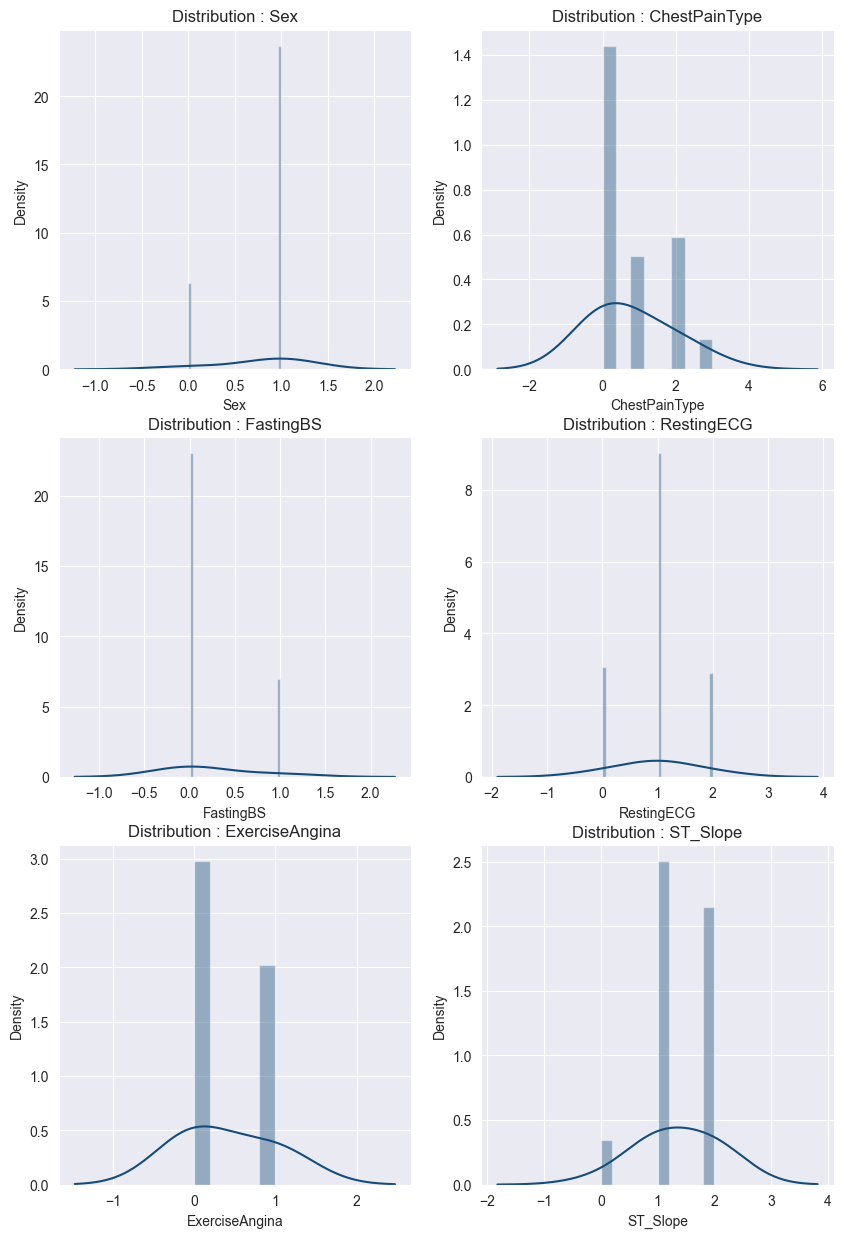

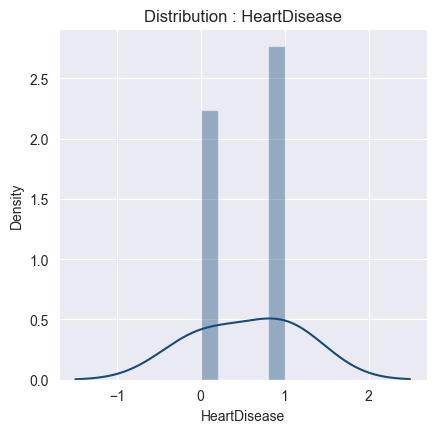

In [11]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
for i in range(len(categorical_features) - 1):
    plt.subplot(3, 2, i + 1)
    sns.distplot(df1[categorical_features[i]], kde_kws={'bw': 1}, color=colors[0])
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

plt.figure(figsize=(4.75, 4.55))
sns.distplot(df1[categorical_features[len(categorical_features) - 1]], kde_kws={'bw': 1}, color=colors[0])
title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
plt.title(title)

- All the categorical features are near about **Normally Distributed**.

### Numerical Features

#### Distribution of Numerical Features

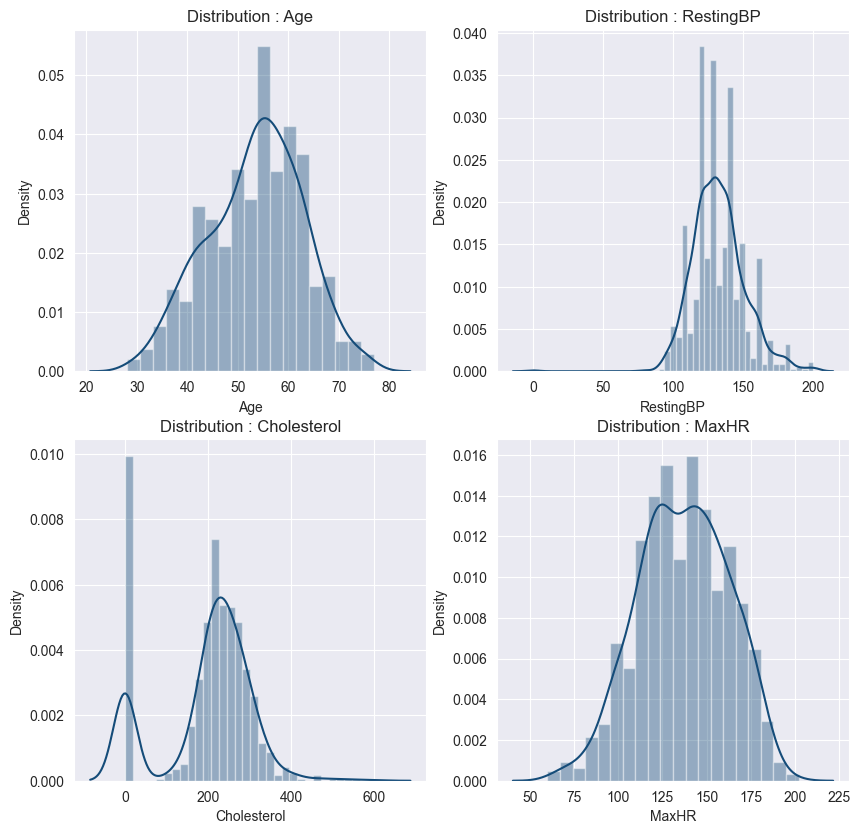

Text(0.5, 1.0, 'Distribution : Oldpeak')

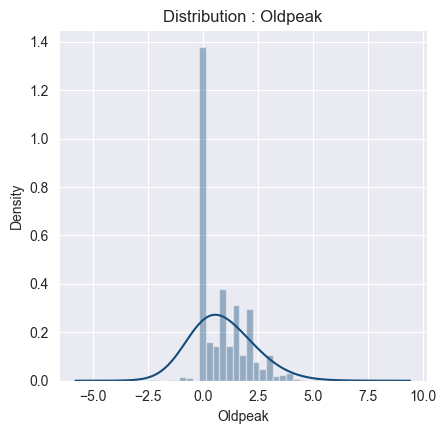

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 9.75))
for i in range(len(numerical_features) - 1):
    plt.subplot(2, 2, i + 1)
    sns.distplot(data[numerical_features[i]], color=colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize=(4.75, 4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]], kde_kws={'bw': 1}, color=colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title)

- **Oldpeak's** data distribution is rightly skewed.
- **Cholestrol** has a bidmodal data distribution.

### Target Variable Visualization (HeartDisease)

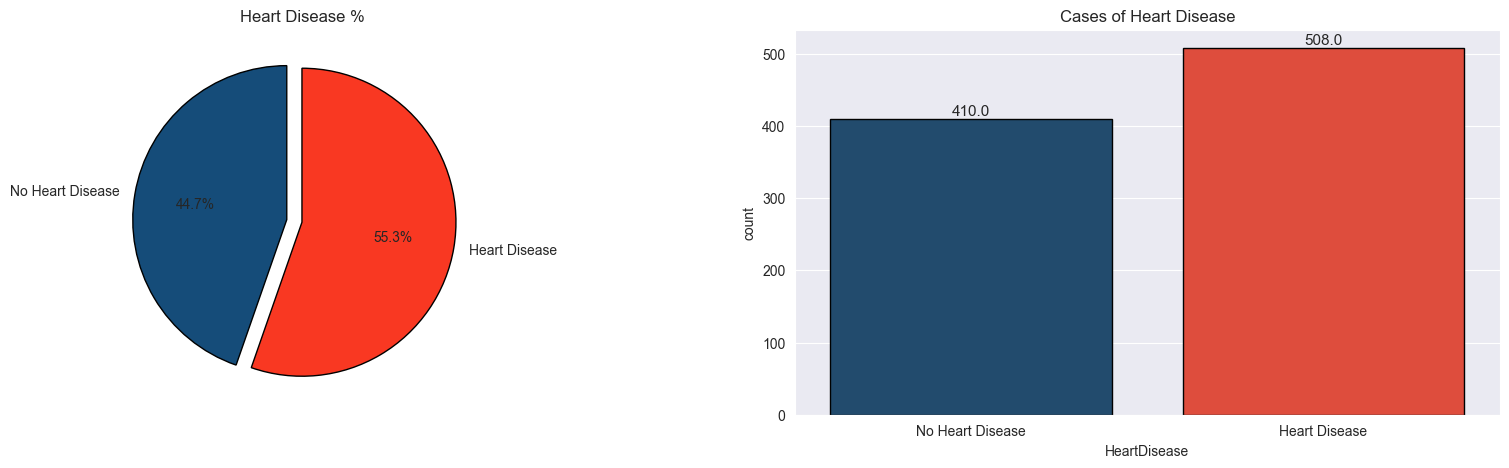

In [13]:
l = list(data['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100, l[0] / sum(l) * 100]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.pie(circle, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0),
        colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Heart Disease %')

plt.subplot(1, 2, 2)
ax = sns.countplot(x='HeartDisease', data=data, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 5, rect.get_height(), horizontalalignment='center',
            fontsize=11)
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])
plt.title('Cases of Heart Disease')
plt.show()

- The dataset is pretty much **evenly balanced!**

### Categorical Features vs Target Variable (HeartDisease)

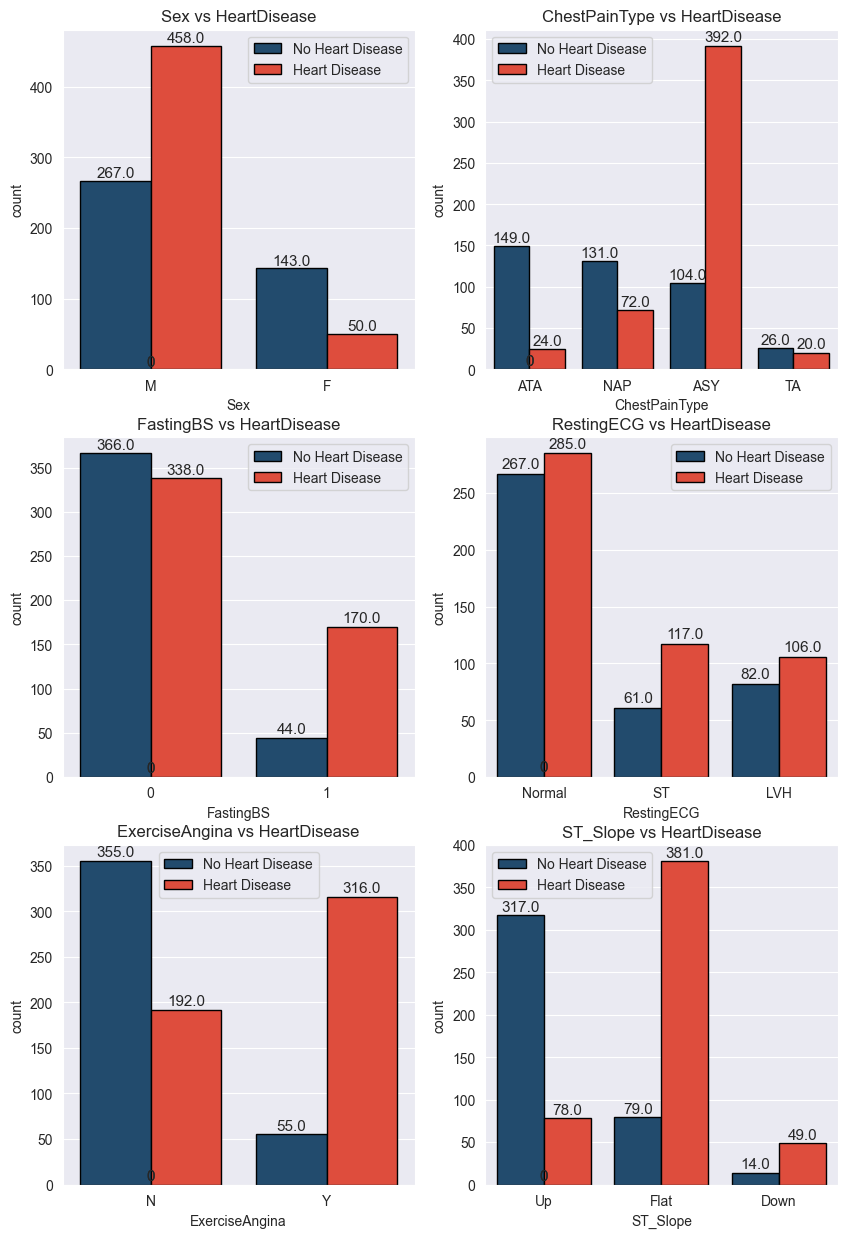

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
for i in range(len(categorical_features) - 1):
    plt.subplot(3, 2, i + 1)
    ax = sns.countplot(x=categorical_features[i], data=data, hue="HeartDisease", palette=colors, edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 5, rect.get_height(),
                horizontalalignment='center', fontsize=11)
    title = categorical_features[i] + ' vs HeartDisease'
    plt.legend(['No Heart Disease', 'Heart Disease'])
    plt.title(title)

- **Male** population has more heart disease patients than no heart disease patients. In the case of **Female** population, heart disease patients are less than no heart disease patients. 
- **ASY** type of chest pain boldly points towards major chances of heart disease.
- **Fasting Blood Sugar** is tricky! Patients diagnosed with Fasting Blood Sugar and no Fasting Blood Sugar have significant heart disease patients. 
- **RestingECG** does not present with a clear cut category that highlights heart disease patients. All the 3 values consist of high number of heart disease patients.
- **Exercise Induced Engina** definitely bumps the probability of being diagnosed with heart diseases.
- With the **ST_Slope** values, **flat** slope displays a very high probability of being diagnosed with heart disease. **Down** also shows the same output but in very few data points. 

### Categorical Features vs Positive Heart Disease Cases

In [15]:
heart_disease_frames = data['HeartDisease'] == 1

sex = data[heart_disease_frames]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = data[heart_disease_frames]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100, cp[1] / sum(cp) * 100, cp[2] / sum(cp) * 100, cp[3] / sum(cp) * 100]

fbs = data[heart_disease_frames]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100, fbs[1] / sum(fbs) * 100]

restecg = data[heart_disease_frames]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100, restecg[1] / sum(restecg) * 100, restecg[2] / sum(restecg) * 100]

exang = data[heart_disease_frames]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100, exang[1] / sum(exang) * 100]

slope = data[heart_disease_frames]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100, slope[1] / sum(slope) * 100, slope[2] / sum(slope) * 100]

Text(0.5, 1.0, 'ST_Slope')

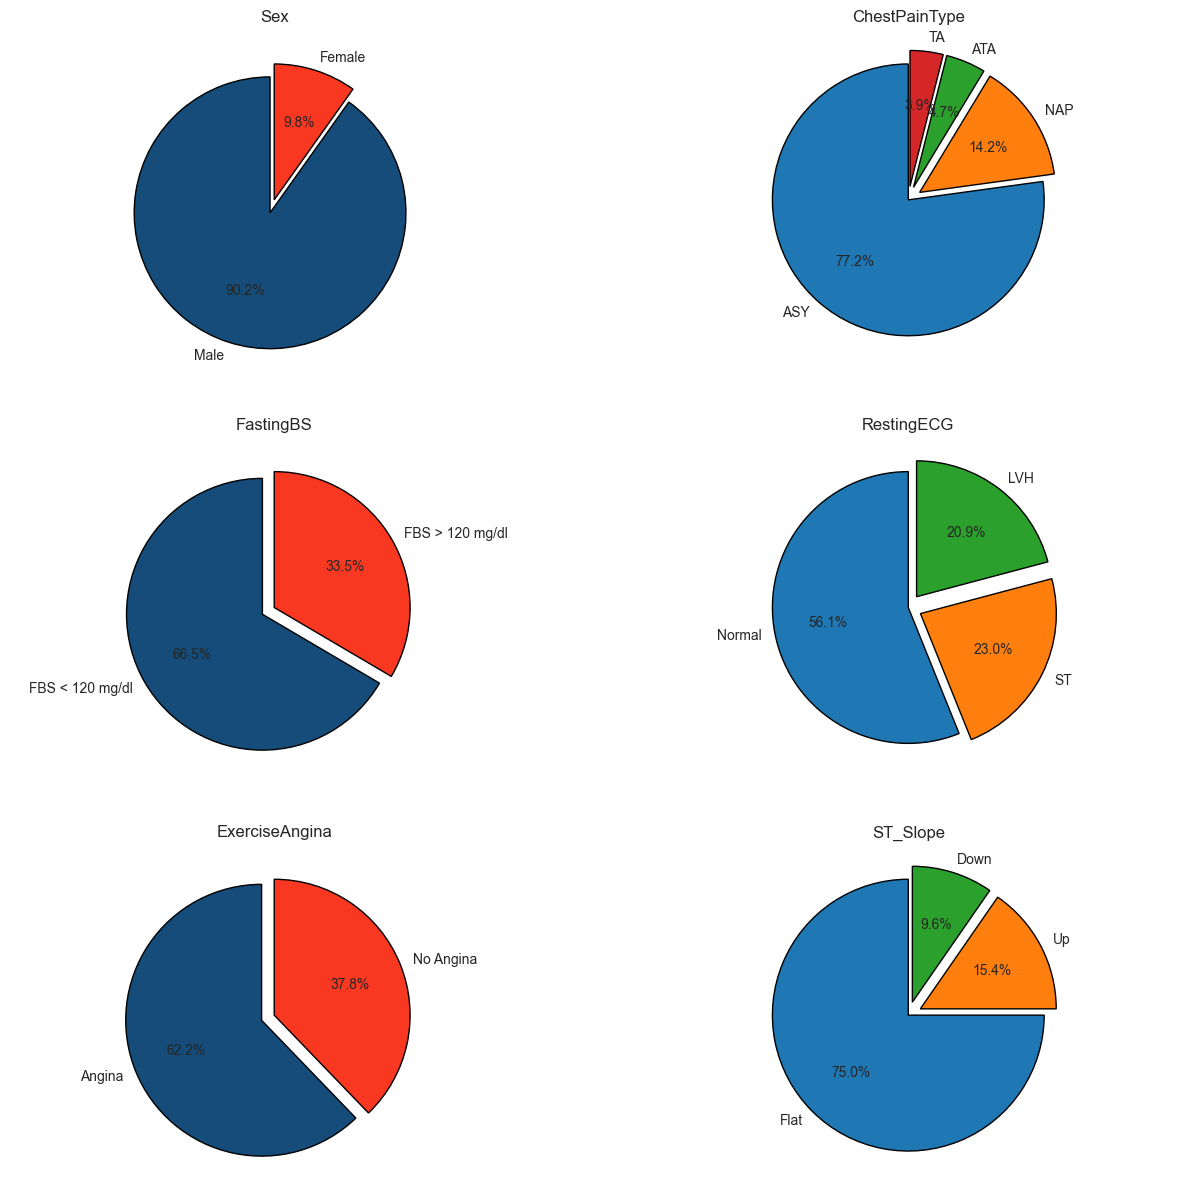

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15), facecolor='white')  # overall figure face
for ax in axes.flat:
    ax.set_facecolor("white")  # each subplot's face
    ax.set_axis_off()  # we want a clean pie with no axes at all

plt.subplot(3, 2, 1)
plt.pie(sex, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Sex')

plt.subplot(3, 2, 2)
plt.pie(cp, labels=['ASY', 'NAP', 'ATA', 'TA'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1, 0.1, 0.1),
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('ChestPainType')

plt.subplot(3, 2, 3)
plt.pie(fbs, labels=['FBS < 120 mg/dl', 'FBS > 120 mg/dl'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0),
        colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('FastingBS')

plt.subplot(3, 2, 4)
plt.pie(restecg, labels=['Normal', 'ST', 'LVH'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1, 0.1),
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('RestingECG')

plt.subplot(3, 2, 5)
plt.pie(exang, labels=['Angina', 'No Angina'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('ExerciseAngina')

plt.subplot(3, 2, 6)
plt.pie(slope, labels=['Flat', 'Up', 'Down'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1, 0.1),
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('ST_Slope')

- Out of all the heart disease patients, a staggering 90% patients are **male**.
- When it comes to the type of chest pain, **ASY** type holds the majority with 77% that lead to heart diseases.
- **Fasting Blood Sugar** level < 120 mg/dl displays high chances of heart diseases.
- For **RestingECG**, **Normal** level accounts for 56% chances of heart diseases than **LVH** and **ST** levels.
- Detection of **Exercise Induced Angina** also points towards heart diseases.
- When it comes to **ST_Slope** readings, **Flat** level holds a massive chunk with 75% that may assist in detecting underlying heart problems. 

### Numerical Features vs Target Variable (HeartDisease)

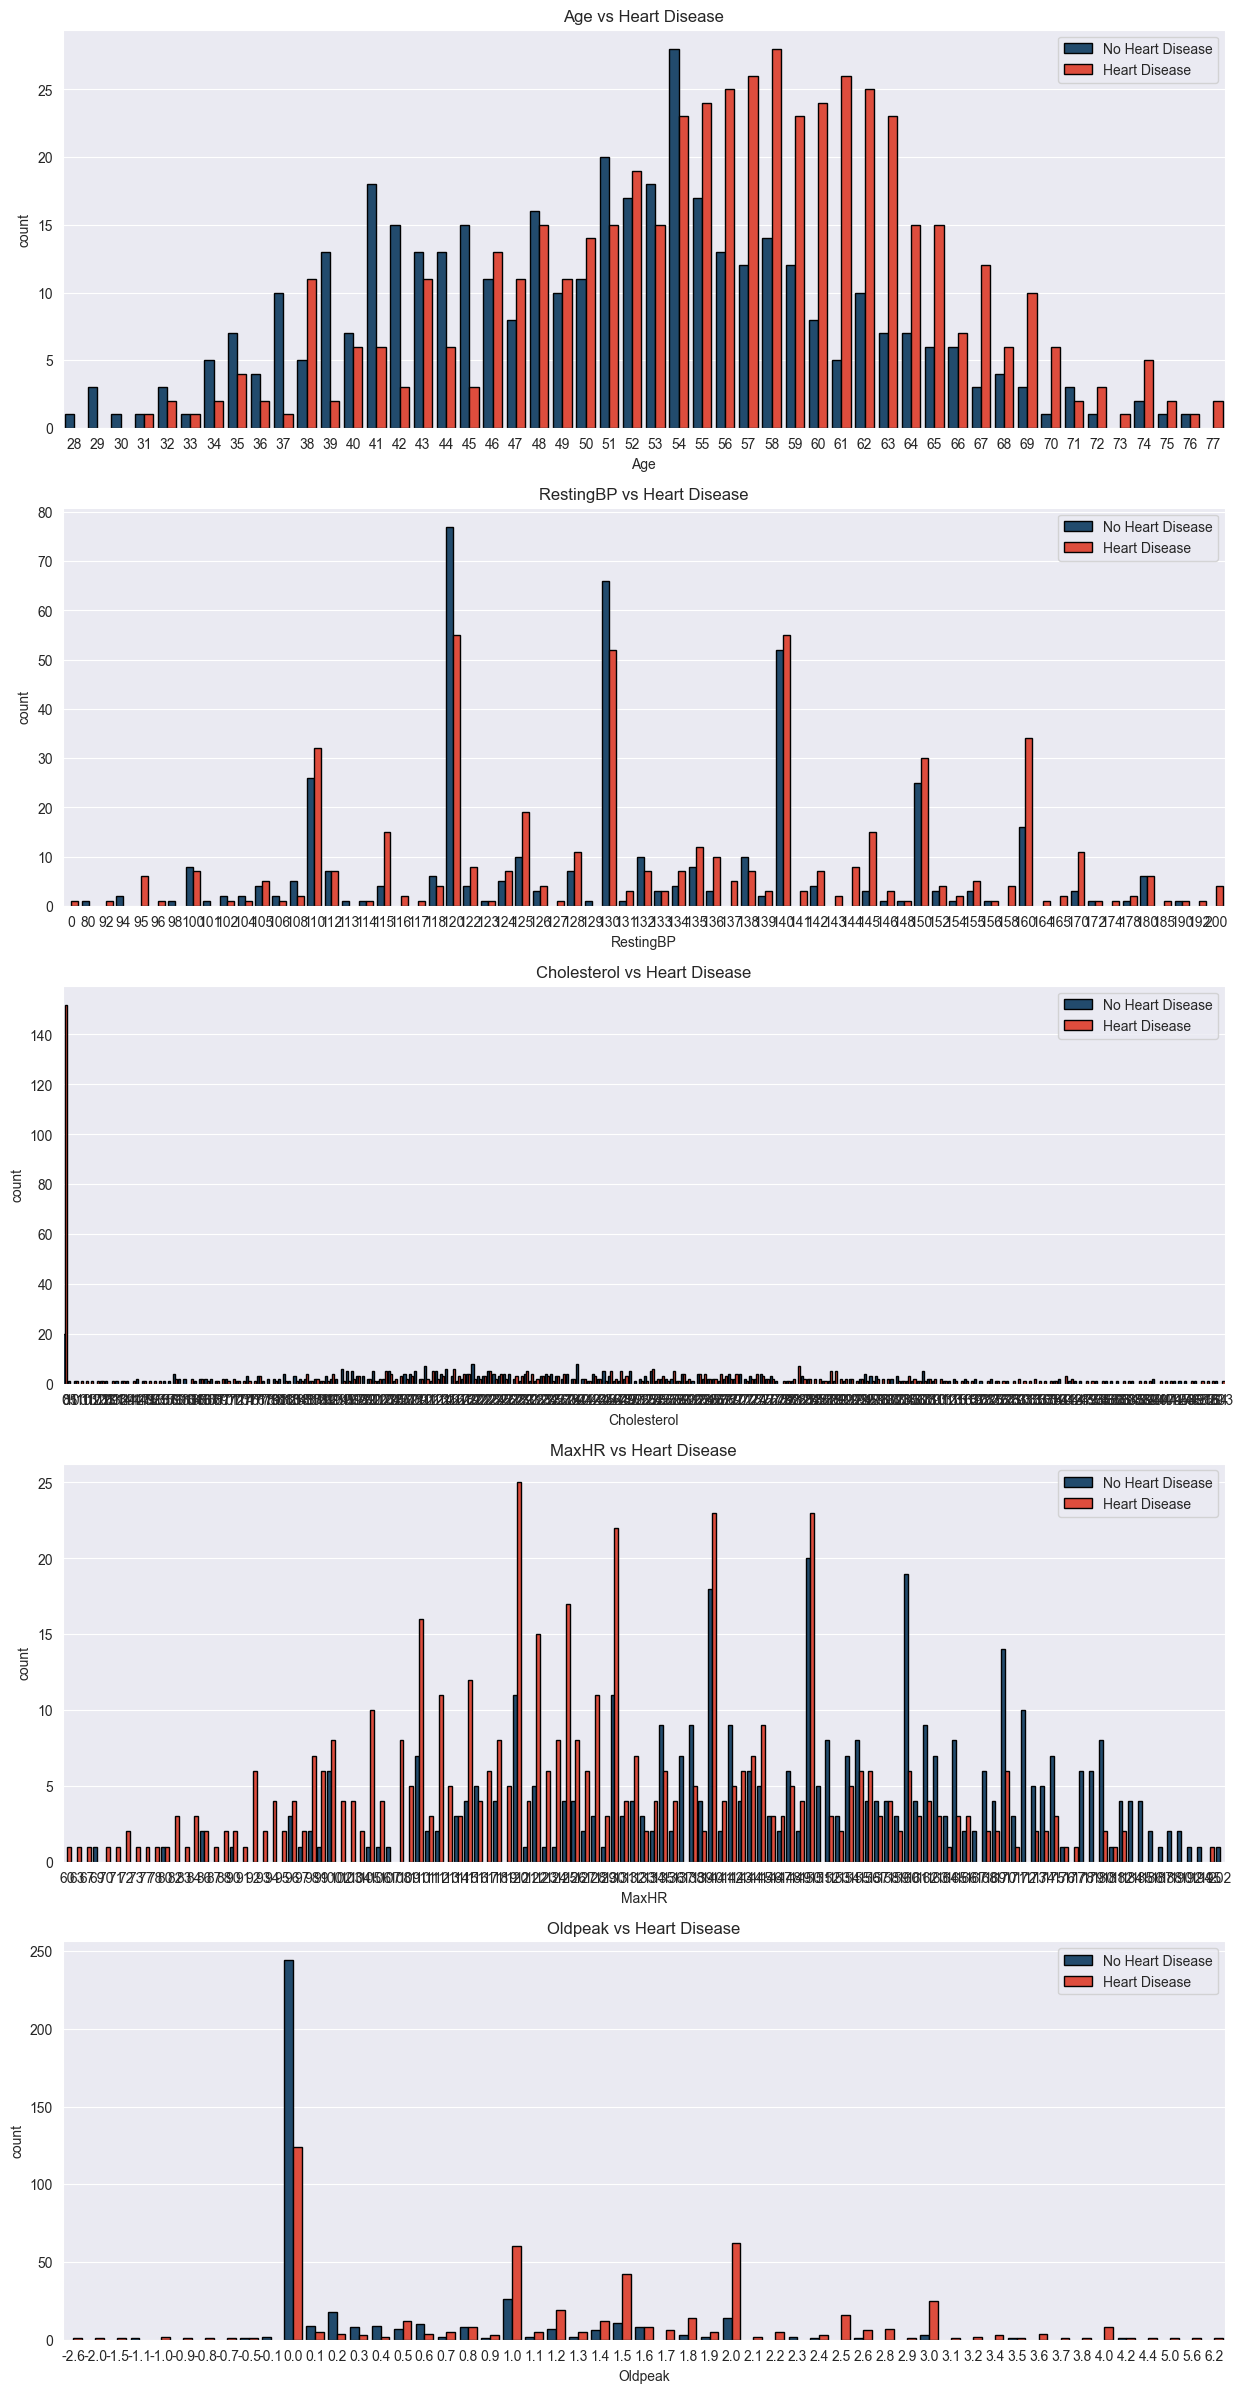

In [17]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 30))
for i in range(len(numerical_features)):
    plt.subplot(5, 1, i + 1)
    sns.countplot(x=numerical_features[i], data=data, hue="HeartDisease", palette=colors, edgecolor='black')
    title = numerical_features[i] + ' vs Heart Disease'
    plt.legend(['No Heart Disease', 'Heart Disease'])
    plt.title(title)

- Because of too many unique data points in the above features, it is difficult to gain any type of insight. Thus, we will convert these numerical features,except age, into categorical features for understandable visualization and gaining insights purposes. 
- Thus, we scale the individual values of these features. This brings the varied data points to a constant value that represents a range of values.
- Here, we divide the data points of the numerical features by 5 or 10 and assign its quotient value as the representative constant for that data point. The scaling constants of 5 & 10 are decided by looking into the data & intuition. 

In [18]:
data['RestingBP_Group'] = [int(i / 5) for i in data['RestingBP']]
data['Cholesterol_Group'] = [int(i / 10) for i in data['Cholesterol']]
data['MaxHR_Group'] = [int(i / 5) for i in data['MaxHR']]
data['Oldpeak_Group'] = [int((i * 10) / 5) for i in data['Oldpeak']]

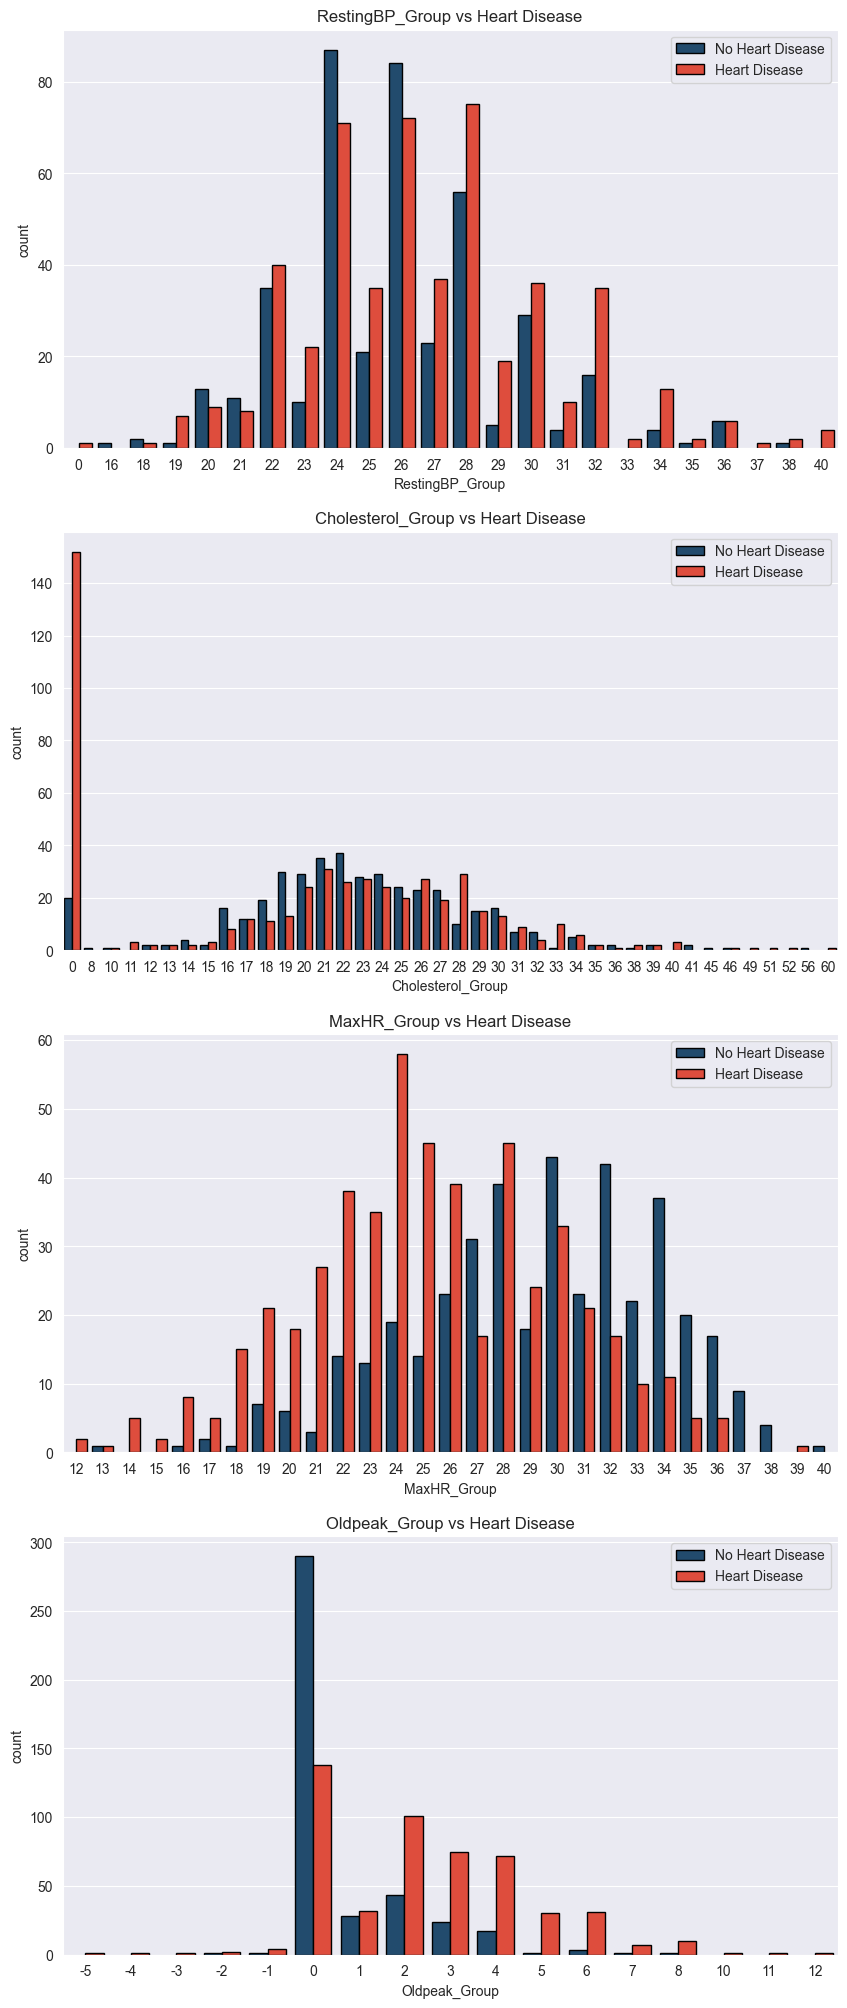

In [19]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 25))
group_numerical_features = [i + '_Group' for i in numerical_features[1:]]
for i in range(len(group_numerical_features)):
    plt.subplot(4, 1, i + 1)
    sns.countplot(x=group_numerical_features[i], data=data, hue="HeartDisease", palette=colors, edgecolor='black')
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = group_numerical_features[i] + ' vs Heart Disease'
    plt.title(title)

- From the **RestingBP** group data, **95** (19x5) - **170** (34x5) readings are most prone to be detected with heart diseases.
- **Cholesterol** levels between **160** (16x10) - **340** (34x10) are highly susceptible to heart diseases.
- For the **MaxHR** readings, heart diseases are found throughout the data but **70** (14x5) - **180** (36x5) values has detected many cases. 
- **Oldpeak** values also display heart diseases throughout. **0** (0x5/10) - **4** (8x5/10) slope values display high probability to be diagnosed with heart diseases.

### Numerical features vs Categorical features w.r.t Target variable(HeartDisease)

#### Sex vs Numerical Features

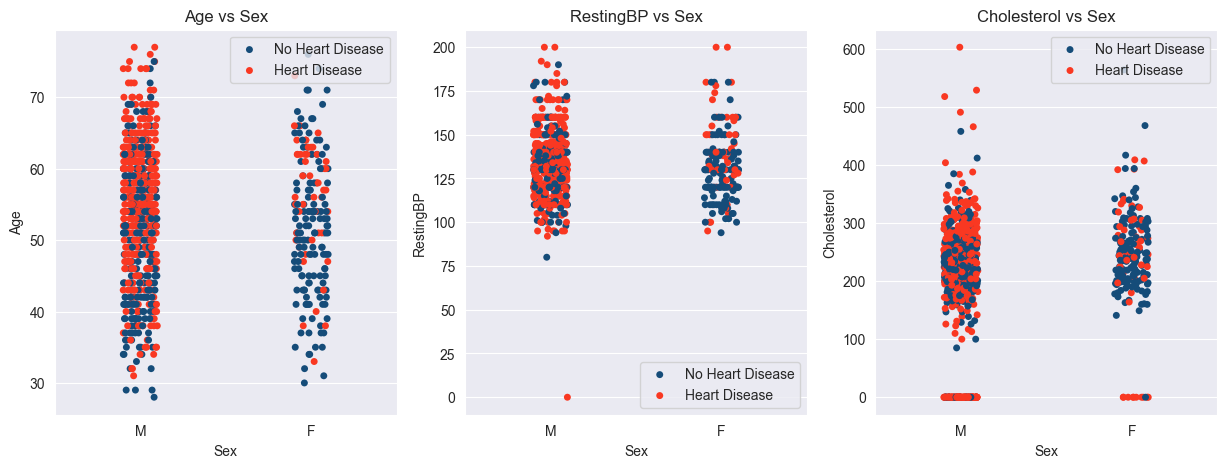

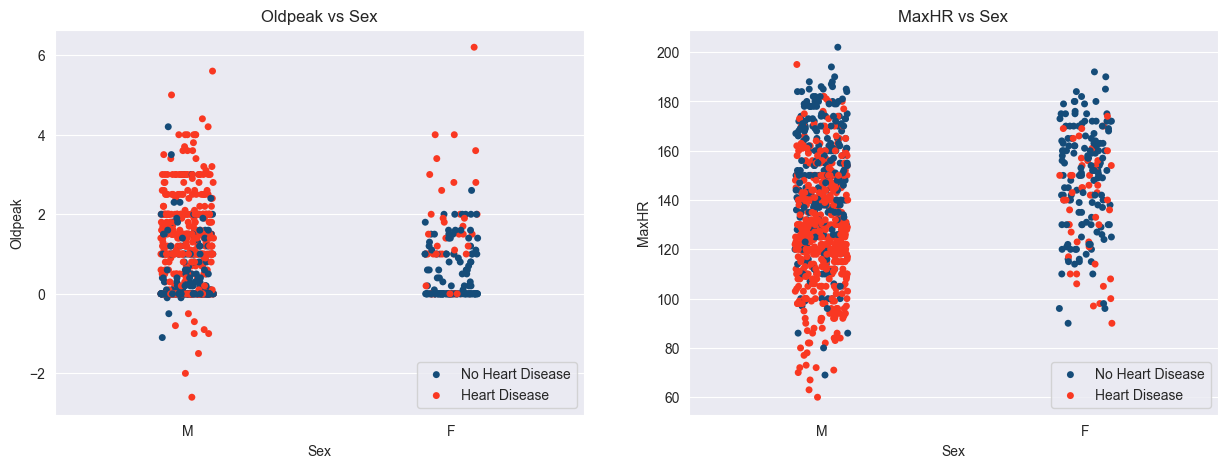

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    sns.stripplot(x='Sex', y=numerical_features[i], data=data, hue='HeartDisease', palette=colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex'
    plt.title(title)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in [-1, -2]:
    plt.subplot(1, 2, -i)
    sns.stripplot(x='Sex', y=numerical_features[i], data=data, hue='HeartDisease', palette=colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex'
    plt.title(title)

- **Male** population displays heart diseases at near about all the values of the numerical features. Above the age of 50, positive old peak values and maximum heart rate below 140, heart diseases in male population become dense.
- **Female** population data points are very less as compared to **male** population data points. Hence, we cannot point to specific ranges or values that display cases of heart diseases. 

#### ChestPainType vs Numerical Features

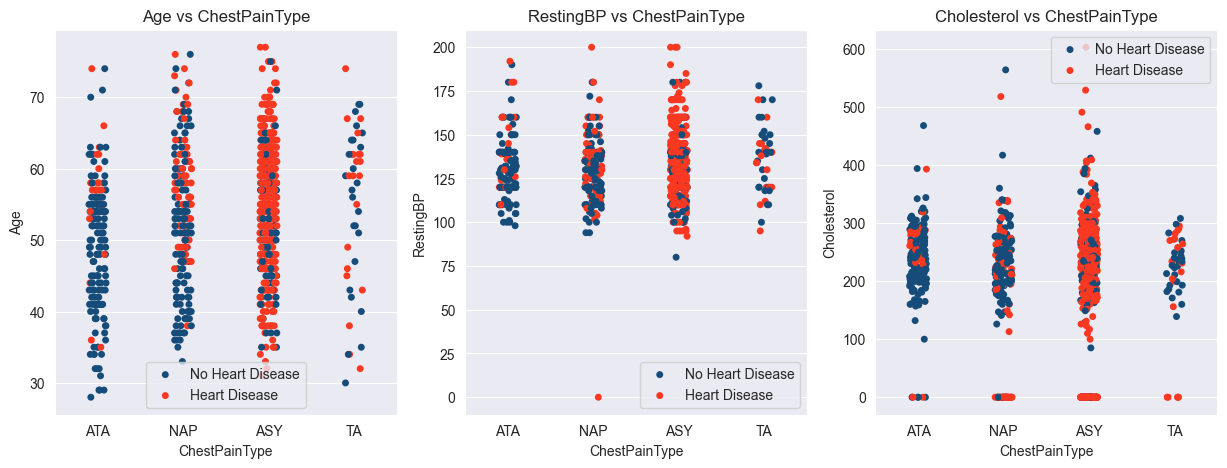

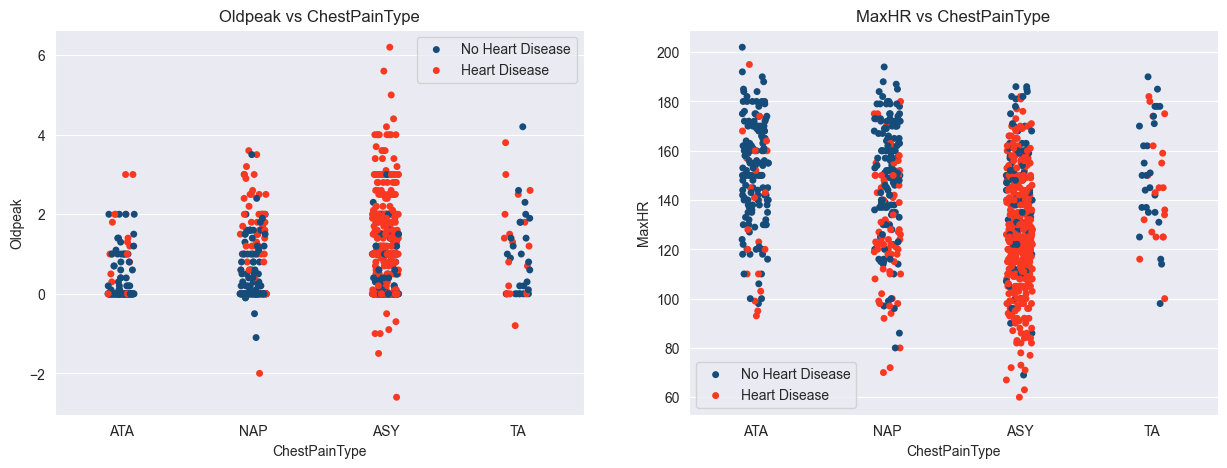

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    sns.stripplot(x='ChestPainType', y=numerical_features[i], data=data, hue='HeartDisease', palette=colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in [-1, -2]:
    plt.subplot(1, 2, -i)
    sns.stripplot(x='ChestPainType', y=numerical_features[i], data=data, hue='HeartDisease', palette=colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title)

- **ASY** type of chest pain dominates other types of chest pain in all the numerical features by a lot.

#### FastingBS vs Numerical features

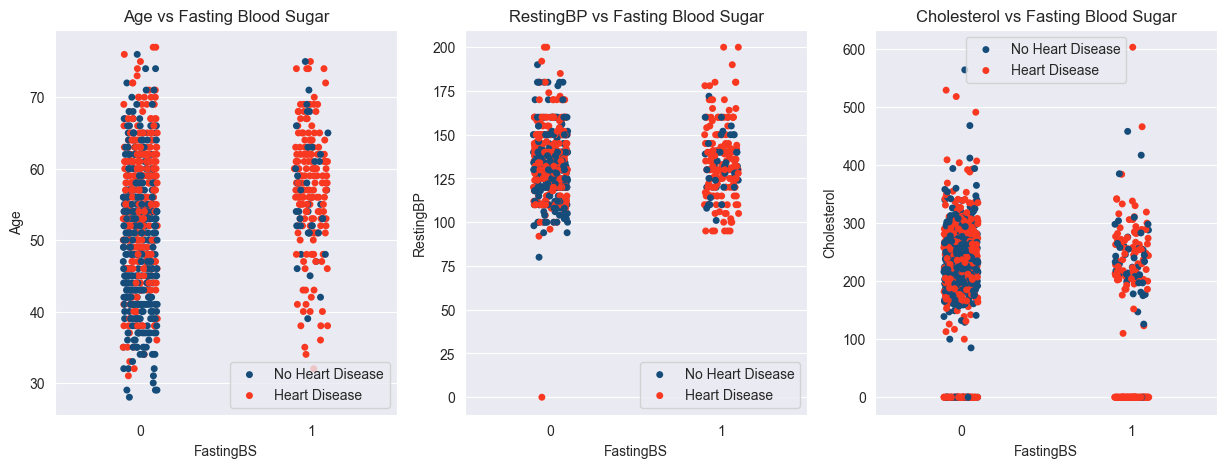

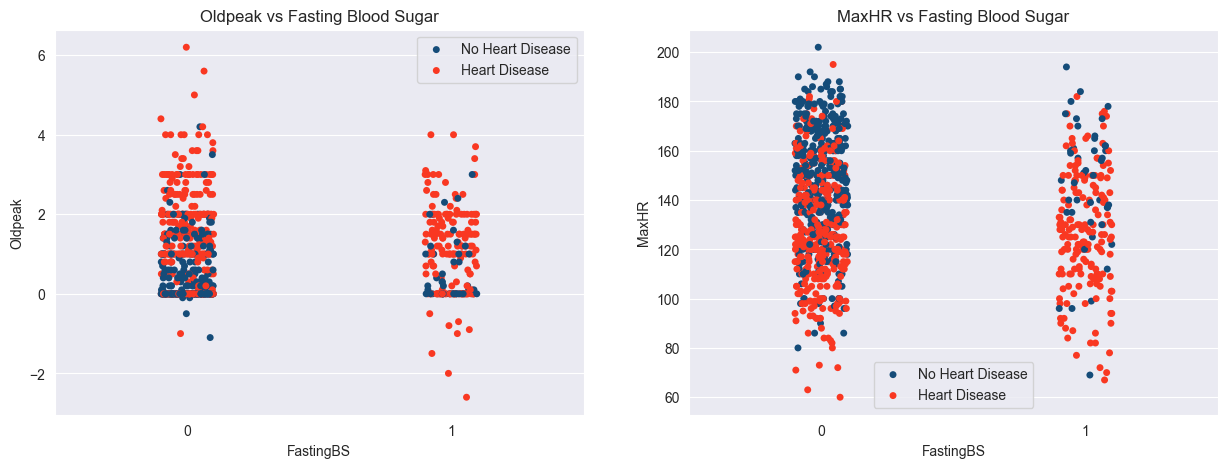

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    sns.stripplot(x='FastingBS', y=numerical_features[i], data=data, hue='HeartDisease', palette=colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar'
    plt.title(title)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in [-1, -2]:
    plt.subplot(1, 2, -i)
    sns.stripplot(x='FastingBS', y=numerical_features[i], data=data, hue='HeartDisease', palette=colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar'
    plt.title(title)

- Above the **age** 50, heart diseases are found throughout the data irrespective of the patient being diagnosed with Fasting Blood Sugar or not.
- **Fasting Blood Sugar** with **Resting BP** over 100 has displayed more cases of heart diseases than patients with no fasting blood sugar.
- **Cholesterol** with **Fasting Blood Sugar** does not seem to have an effect in understanding reason behind heart diseases.
- Patients that have not been found positive with **Fasting Blood Sugar** but have maximum heart rate below 130 are more prone to heart diseases.

#### RestingECG vs Numerical Features

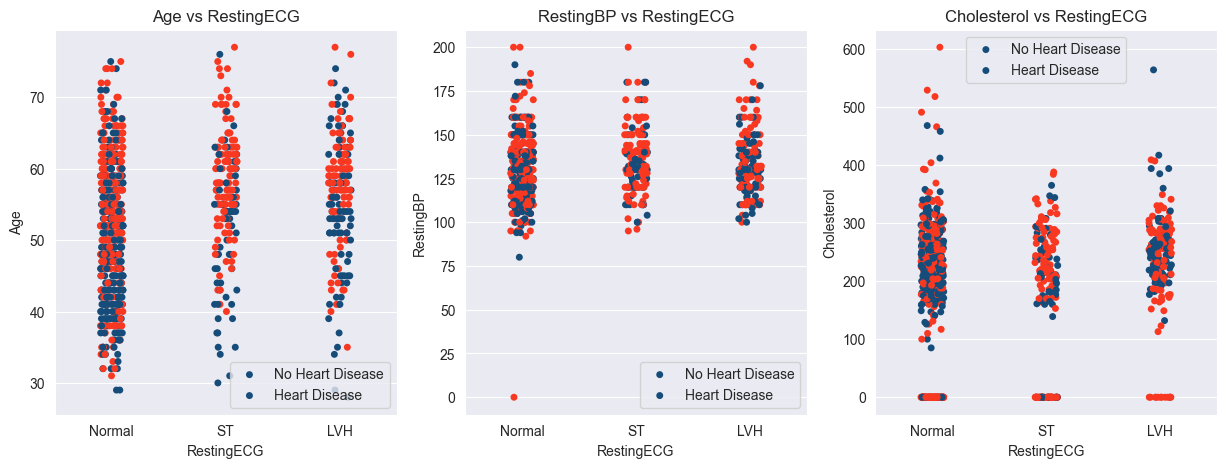

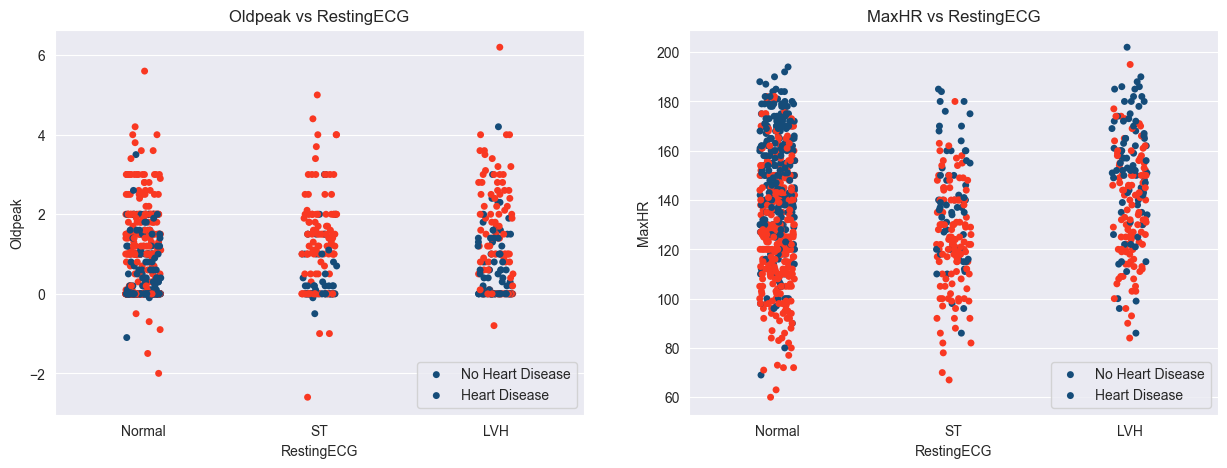

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    sns.stripplot(x='RestingECG', y=numerical_features[i], data=data, hue='HeartDisease', palette=colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG'
    plt.title(title)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in [-1, -2]:
    plt.subplot(1, 2, -i)
    sns.stripplot(x='RestingECG', y=numerical_features[i], data=data, hue='HeartDisease', palette=colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG'
    plt.title(title)

- Heart diseases with **RestingECG** values of **Normal**, **ST** and **LVH** are detected starting from 30,40 & 40 respectively. Patients above the age of 50 are more prone than anyother ages irrespective of **RestingECG** values.
- Heart diseases are found consistently throughout any values of **RestingBP** and **RestingECG**.
- **Cholesterol** values between 200 - 300 coupled with **ST** value of **RestingECG** display a patch of patients suffering from heart diseases. 
- For **maximum Heart Rate** values, heart diseases are detected in dense below 140 points and **Normal** RestingECG. **ST** & **LVH** throughout the maximum heart rate values display heart disease cases.

#### ExerciseAngina vs Numerical Features

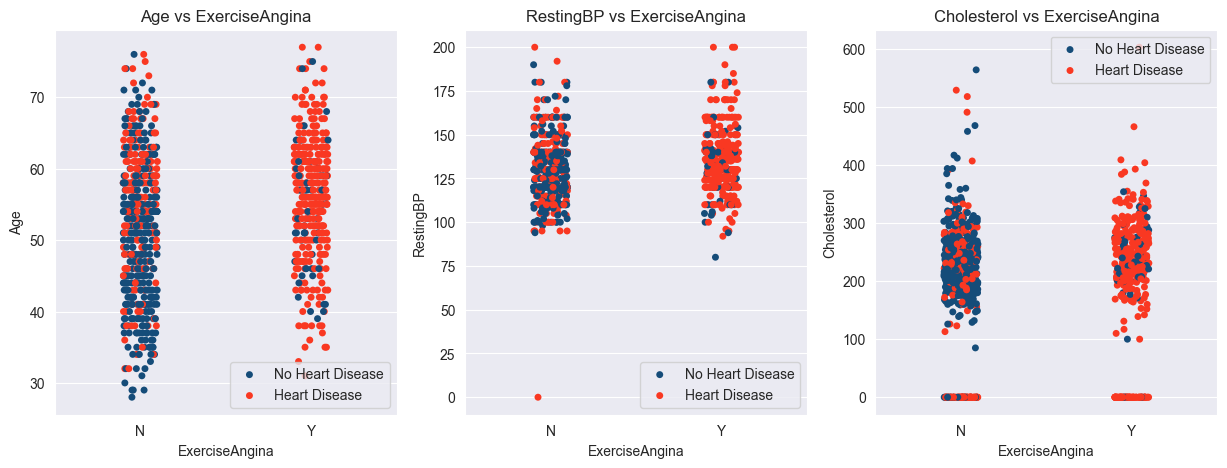

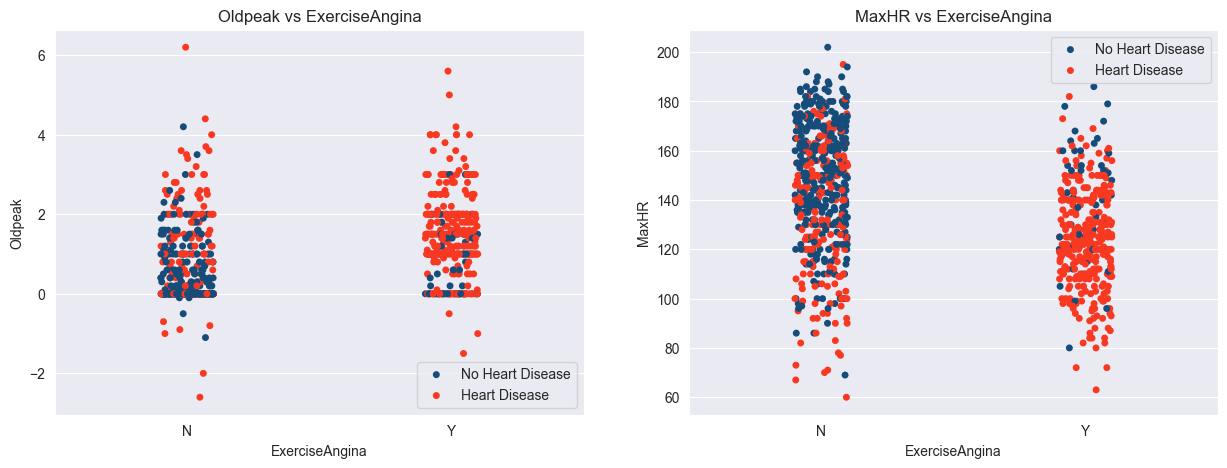

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    sns.stripplot(x='ExerciseAngina', y=numerical_features[i], data=data, hue='HeartDisease', palette=colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in [-1, -2]:
    plt.subplot(1, 2, -i)
    sns.stripplot(x='ExerciseAngina', y=numerical_features[i], data=data, hue='HeartDisease', palette=colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title)

- A crsytal clear observation can be made about the relationship between **heart disease** case and **Exercise induced Angina**. A positive correlation between the 2 features can be concluded throughout all the numerical features. 

#### ST_Slope vs Numerical Features

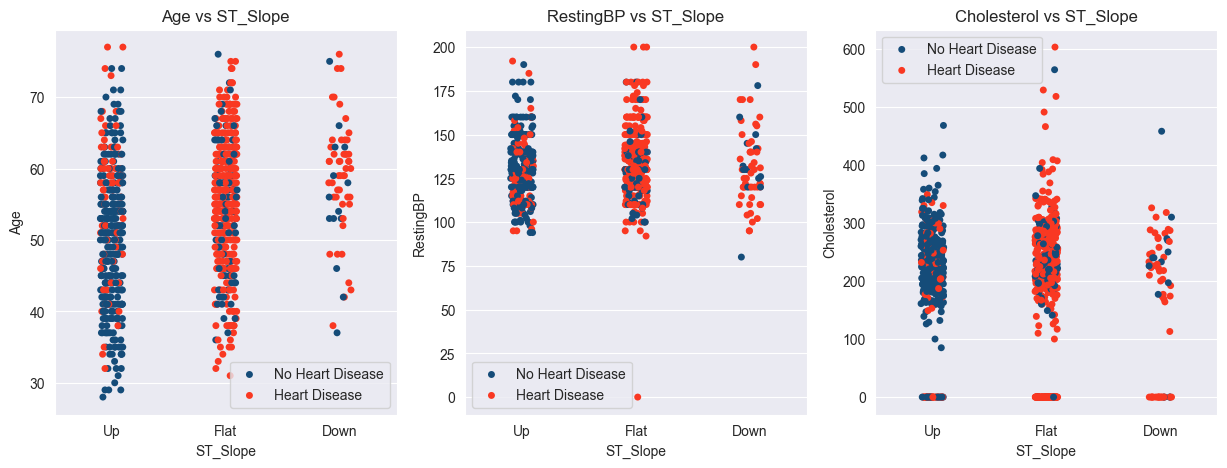

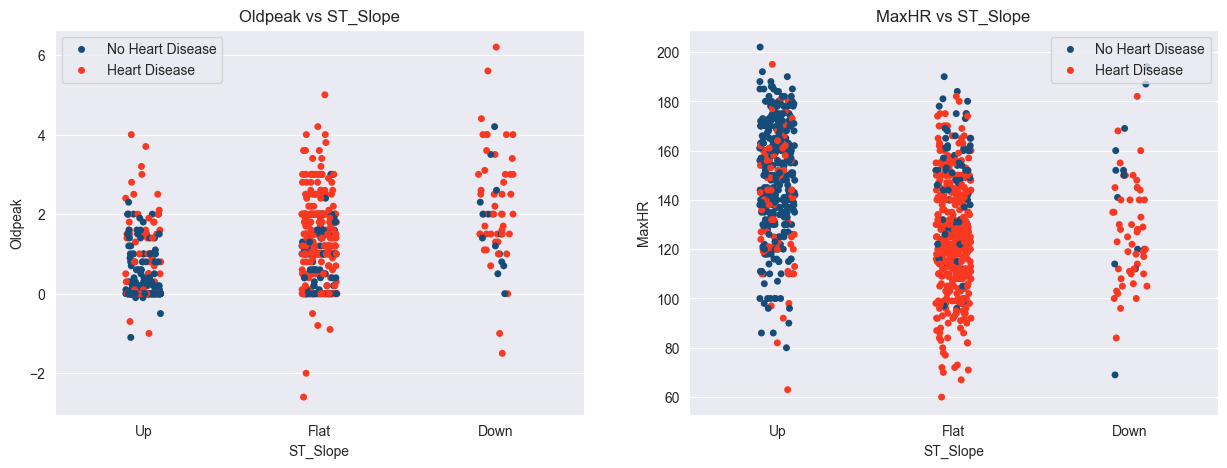

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    sns.stripplot(x='ST_Slope', y=numerical_features[i], data=data, hue='HeartDisease', palette=colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in [-1, -2]:
    plt.subplot(1, 2, -i)
    sns.stripplot(x='ST_Slope', y=numerical_features[i], data=data, hue='HeartDisease', palette=colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title)

- Another crystal clear positive observation can be made about the positive correlation between **ST_Slope** value and **Heart Disease** cases. 
- **Flat**, **Down** and **Up** in that order display high, middle and low probability of being diagnosed with heart diseases respectively.

### Numerical features vs Numerical features w.r.t Target variable(HeartDisease)

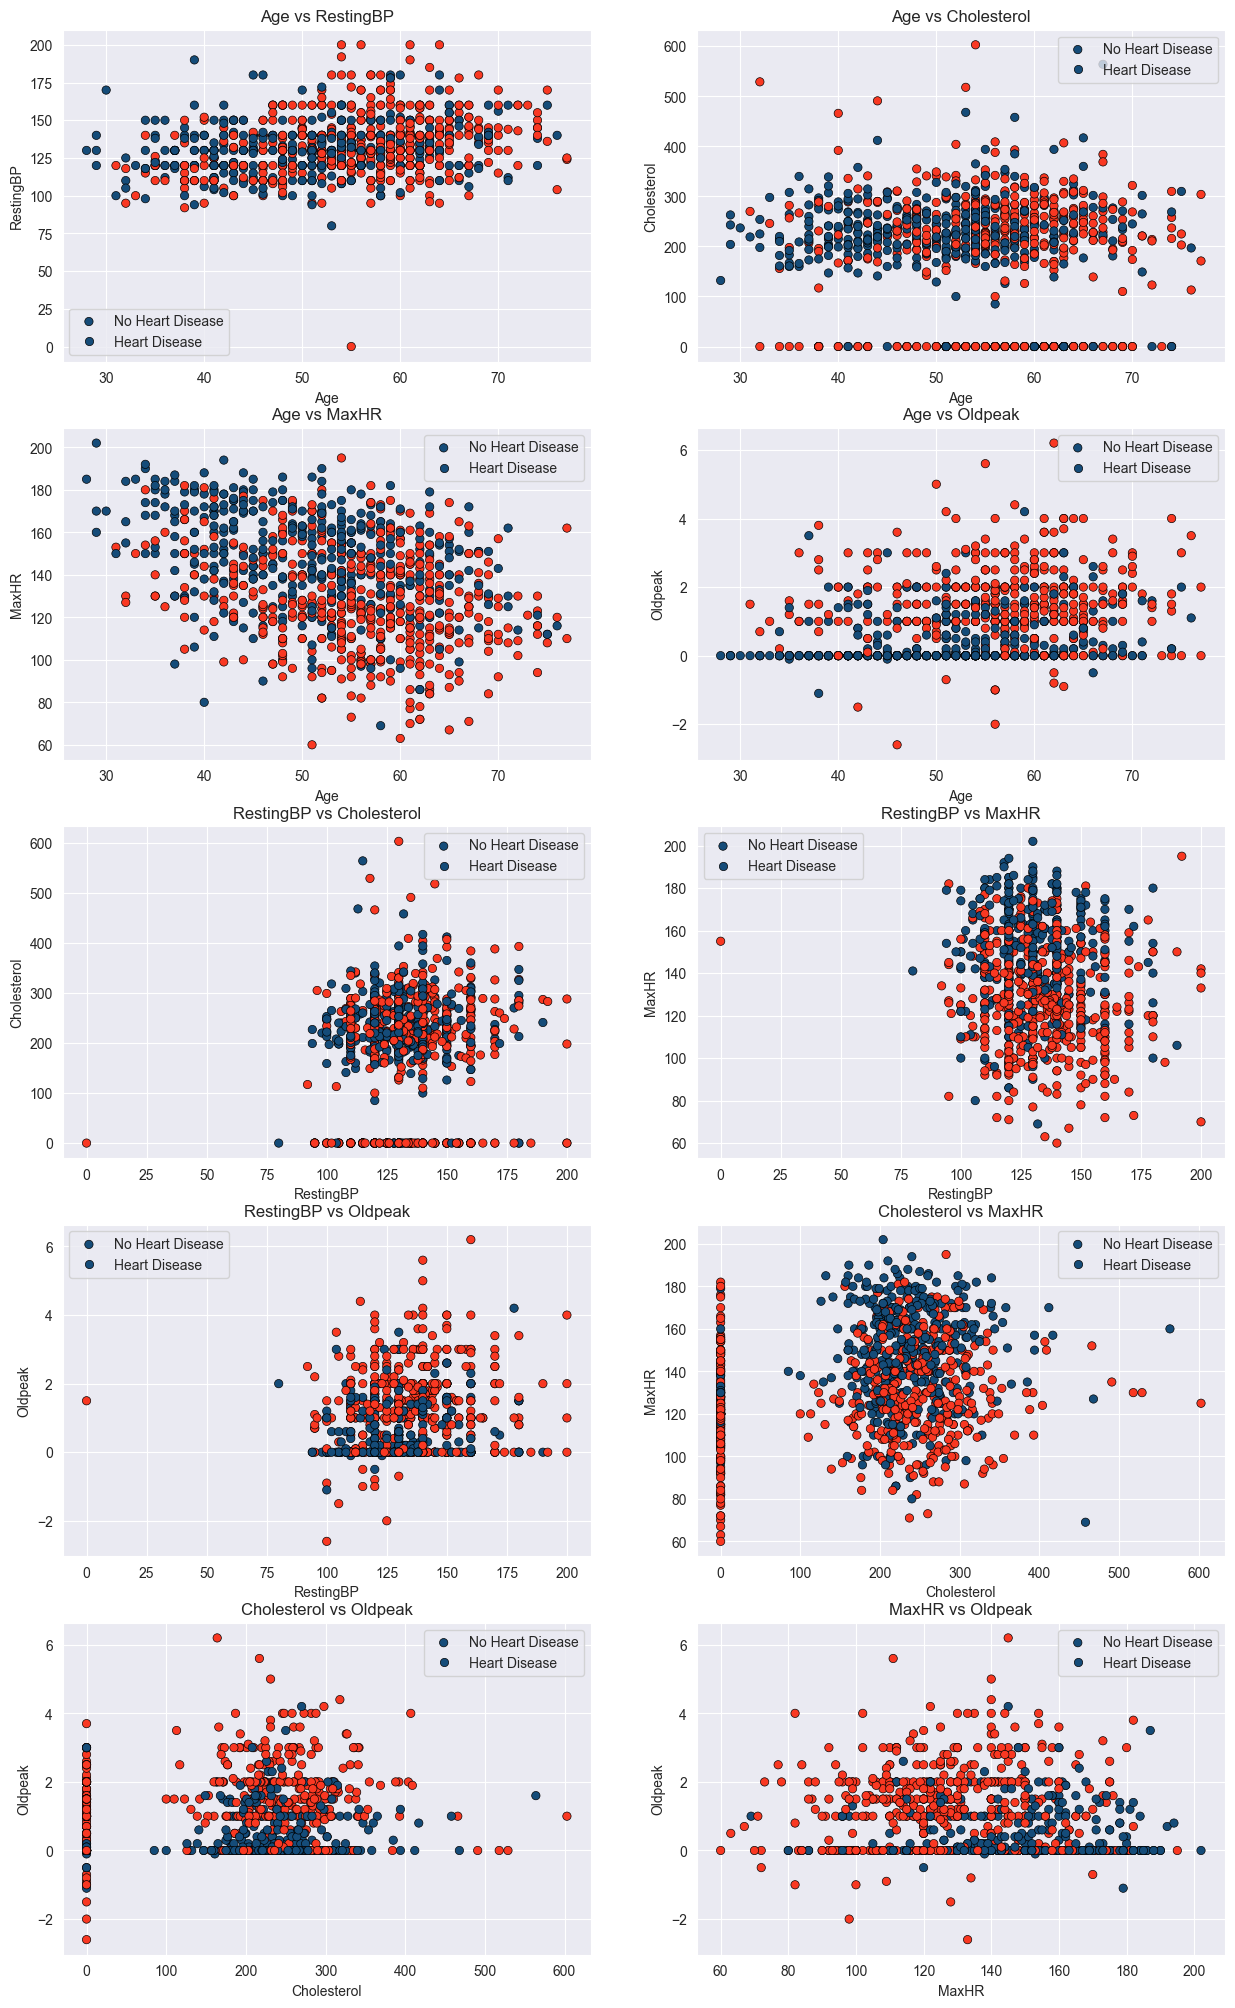

In [26]:
a = 0
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(5, 2, a)
            sns.scatterplot(x=numerical_features[i], y=numerical_features[j], data=data, hue='HeartDisease',
                            palette=colors, edgecolor='black')
            plt.legend(['No Heart Disease', 'Heart Disease'])
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

- For **age** 50+, **RestingBP** between 100 - 175, **Cholesterol** level of 200 - 300,**Max Heart Rate** below 160 and positive **oldpeak** values displays high cases of heart disease.
- For **RestingBP** values 100 - 175, highlights too many heart disease patients for all the features.
- **Cholesterol** values 200 - 300 dominates the heart disease cases.
- Similarly, **Max Heart Rate** values below 140 has high probability of being diagnosed with heart diseases.


## Summary of EDA
### Order / Values of features for positive cases of heart disease

- **Categorical Features (Order)**
    - Sex : Male > Female
    - ChestPainType : ASY > NAP > ATA > TA
    - FastingBS : ( FBS < 120 mg/dl ) > ( FBS > 120 mg/dl)
    - RestingECG : Normal > ST > LVH
    - ExerciseAngina : Angina > No Angina
    - ST_Slope : Flat > Up > Down
 
- **Numerical Features (Range)**
    - Age : 50+
    - RestingBP : 95 - 170 
    - Cholesterol : 160 - 340
    - MaxHR : 70 - 180
    - Oldpeak : 0 - 4
    
    
**Now that we have understood the typical values of the features, we move on to the next step where we select the appropriate features for modeling!**

## Feature Engineering

### Data Scaling (Normalization)

- Scaling ensures fair treatment of features, improves model convergence, and enhances performance, especially for distance and gradient-based models.

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mms = MinMaxScaler()  # Normalization
ss = StandardScaler()  # Standardization

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0 -1.43    1              1       0.41         0.83          0           1   
1 -0.48    0              2       1.49        -0.17          0           1   
2 -1.75    1              1      -0.13         0.77          0           2   
3 -0.58    0              0       0.30         0.14          0           1   
4  0.05    1              2       0.95        -0.03          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0   1.38               0     0.30         2             0  
1   0.75               0     0.41         1             1  
2  -1.53               0     0.30         2             0  
3  -1.13               1     0.47         1             1  
4  -0.58               0     0.30         2             0

- Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.

**Eg :** Age = Years FastingBS = mg / dl 

- We have 2 options for data scaling : 1) **Normalization** 2) **Standardization**. As most of the algorithms assume the data to be normally (Gaussian) distributed, **Normalization** is done for features whose data does not display normal distribution and **standardization** is carried out for features that are normally distributed where their values are huge or very small as compared to other features.


- **Normalization** : **Oldpeak** feature is normalized as it had displayed a right skewed data distribution.
- **Standardizarion** : **Age**, **RestingBP**, **Cholesterol** and **MaxHR** features are scaled down because these features are normally distributed.

### Correlation Matrix

<Axes: >

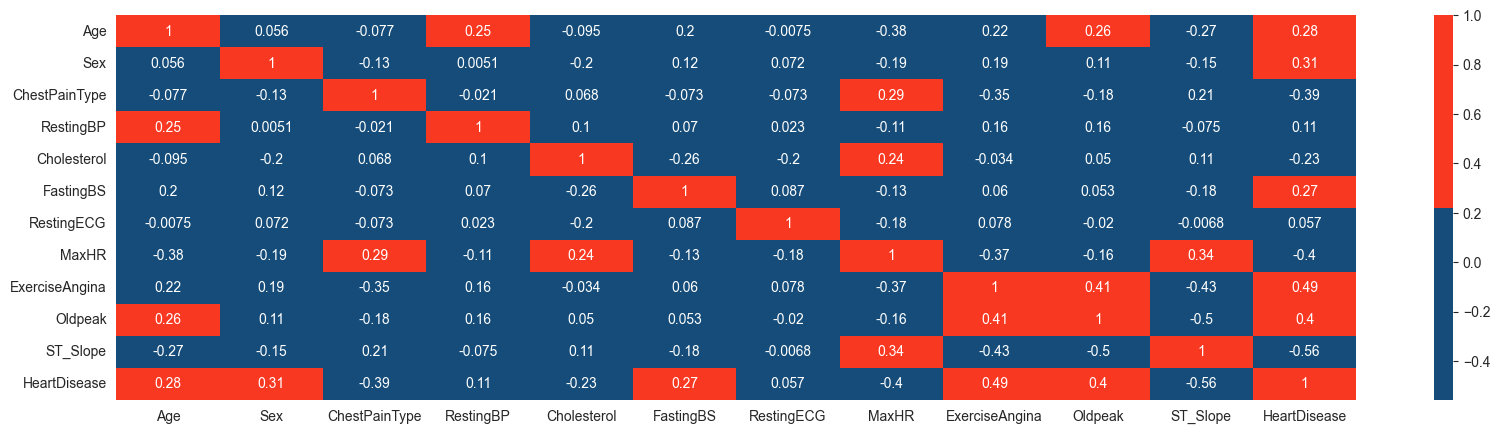

In [28]:
plt.figure(figsize=(20, 5))
sns.heatmap(df1.corr(), cmap=colors, annot=True)

- It is a huge matrix with too many features. We will check the correlation only with **HeartDisease**. 

Text(0.5, 1.0, 'Correlation with HeartDisease')

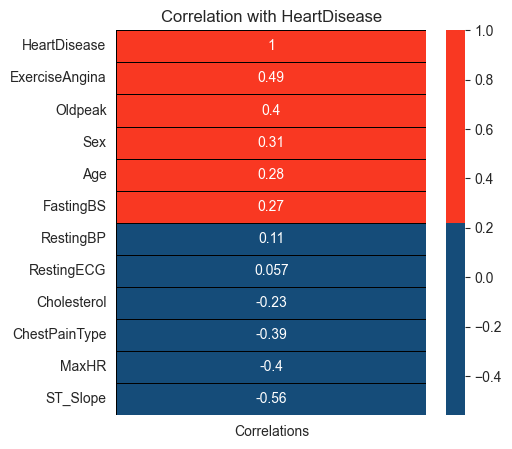

In [29]:
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap=colors, linewidths=0.4, linecolor='black')
plt.title('Correlation with HeartDisease')

- Except for **RestingBP** and **RestingECG**, everyone displays a positive or negative relationship with **HeartDisease**.

### Feature Selection for Categorical Features

#### Chi Squared Test

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Text(0.5, 1.0, 'Selection of Categorical Features')

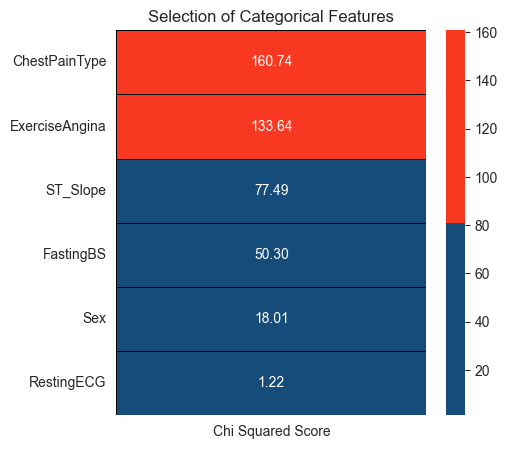

In [31]:
features = df1.loc[:, categorical_features[:-1]]
target = df1.loc[:, categorical_features[-1]]

best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['Chi Squared Score'])

plt.subplots(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(ascending=False, by='Chi Squared Score'), annot=True, cmap=colors, linewidths=0.4,
            linecolor='black', fmt='.2f')
plt.title('Selection of Categorical Features')

- Except **RestingECG**, all the remaining categorical features are pretty important for predicting heart diseases.

### Feature Selection for Numerical Features

#### ANOVA Test

Text(0.5, 1.0, 'Selection of Numerical Features')

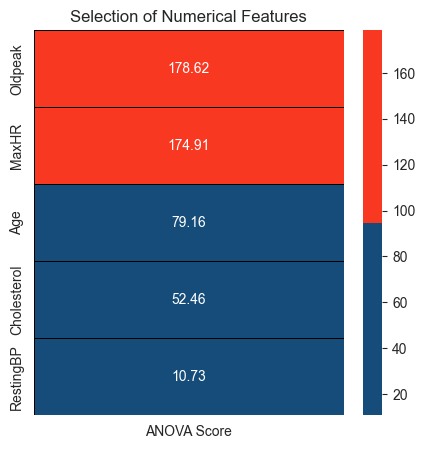

In [32]:
from sklearn.feature_selection import f_classif

features = df1.loc[:, numerical_features]
target = df1.loc[:, categorical_features[-1]]

best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['ANOVA Score'])

plt.subplots(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(ascending=False, by='ANOVA Score'), annot=True, cmap=colors, linewidths=0.4,
            linecolor='black', fmt='.2f')
plt.title('Selection of Numerical Features')

- We will leave out **RestingBP** from the modeling part and take the remaining features.

# <center><div style="font-family: Trebuchet MS background-color: #F93822 color: #FDD20E padding: 12px line-height: 1">Modeling</div></center>

In [33]:
features = df1[df1.columns.drop(['HeartDisease', 'RestingBP', 'RestingECG'])].values
target = df1['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

- Selecting the features from the above conducted tests and splitting the data into **80 - 20 train - test** groups.

In [34]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "SVC": SVC(probability=True, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=1000, max_depth=4, min_samples_leaf=1),
    "KNeighbors": KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "MLP": MLPClassifier(max_iter=500, random_state=42)
}

In [35]:
model_param_grids = {
    "LogisticRegression": {
        "C": [0.01, 0.1, 1, 10],
        "penalty": ["l1", "l2"],          # l1 requires 'liblinear' or 'saga' solver
        "solver": ["liblinear"]
    },
    "SVC": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    },
    "RandomForest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 5, 10],
        "min_samples_split": [2, 5]
    },
    "DecisionTree": {
        "max_depth": [2, 4, 6, None],
        "min_samples_leaf": [1, 2, 5]
    },
    "KNeighbors": {
        "n_neighbors": [3, 5, 7],
        "p": [1, 2],            # 1: Manhattan distance, 2: Euclidean
        "leaf_size": [1, 20]
    },
    "XGBoost": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.01, 0.1, 0.2]
    },
    "MLP": {
        "hidden_layer_sizes": [(64,), (64,32)],
        "alpha": [1e-4, 1e-3, 1e-2],
        "learning_rate_init": [0.001, 0.01]
    }
}

In [36]:
def evaluate_model(name, model, x_train, y_train, x_test, y_test, cv_splits=5):
    """
    Returns a dict with:
     - Cross-validation mean score (accuracy by default here)
     - Test F1
     - Test ROC AUC
     - Test Accuracy
    """
    # 1) Cross-validation (here using accuracy; we can also do 'f1' or 'f1_macro')
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, x_train, y_train, cv=skf, scoring='accuracy')
    cv_mean = np.mean(cv_scores)

    # 2) Fit on full training
    model.fit(x_train, y_train)

    # 3) Predict on test set
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred, average='binary')
    # If multiclass, consider average='macro' or 'weighted'

    # 4) Probability for ROC AUC
    # (Must check if model supports predict_proba; SVC with probability=True does,
    #  or use decision_function for linear SVM if not.)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(x_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        # fallback if no predict_proba
        # for some SVMs, we can do: model.decision_function(X_test)
        roc_auc = np.nan  # or skip

    # 5) Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return {
        "Model": name,
        "CV Mean Accuracy": cv_mean,
        "Test F1": f1,
        "Test ROC AUC": roc_auc,
        "Test Accuracy": accuracy
    }

In [37]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring_metric = "f1"  # could be "f1_macro", "accuracy", etc.

results = []
result_models = {}

for model_name, model_instance in models.items():
    # If this model doesn't have a param grid (not in dictionary), skip or use empty grid
    if model_name not in model_param_grids:
        print(f"No param grid for {model_name}, skipping.")
        continue

    param_grid = model_param_grids[model_name]

    grid_search = GridSearchCV(
        estimator=model_instance,
        param_grid=param_grid,
        scoring=scoring_metric,   # optimize for F1
        cv=cv,
        n_jobs=-1,                # use all CPU cores
        verbose=0                 # set to 2 for more logs
    )

    grid_search.fit(x_train, y_train)

    best_model = grid_search.best_estimator_
    best_cv_score = grid_search.best_score_  # mean F1 from CV

    # Evaluate on test set
    y_pred = best_model.predict(x_test)
    test_f1 = f1_score(y_test, y_pred)
    test_acc = accuracy_score(y_test, y_pred)

    # Compute ROC AUC if predict_proba is available
    if hasattr(best_model, "predict_proba"):
        y_proba = best_model.predict_proba(x_test)[:, 1]
        test_roc_auc = roc_auc_score(y_test, y_proba)
    else:
        # Fallback if no predict_proba
        test_roc_auc = float("nan")

    result_models[model_name] = best_model

    results.append({
        "Model": model_name,
        "Best Params": grid_search.best_params_,
        "CV Mean F1": best_cv_score,
        "Test F1": test_f1,
        "Test Accuracy": test_acc,
        "Test ROC AUC": test_roc_auc
    })

/Users/rocker/PycharmProjects/ELG6131/venv/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [10:27:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rocker/PycharmProjects/ELG6131/venv/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [10:27:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rocker/PycharmProjects/ELG6131/venv/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [10:27:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rocker/PycharmProjects/ELG6131/venv/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [10:27:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { 

In [38]:
results_df = pd.DataFrame(results)
# Sort by Test F1 (descending)
results_df.sort_values("Test F1", ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)

results_df[results_df.columns.drop(['Best Params'])]

Model  CV Mean F1  Test F1  Test Accuracy  Test ROC AUC
0          KNeighbors        0.87     0.89           0.88          0.93
1        DecisionTree        0.86     0.89           0.87          0.91
2                 MLP        0.88     0.88           0.87          0.94
3             XGBoost        0.89     0.88           0.86          0.94
4        RandomForest        0.89     0.88           0.86          0.93
5                 SVC        0.87     0.86           0.85          0.90
6  LogisticRegression        0.87     0.86           0.84          0.90

In [39]:
x_test

array([[ 1.00653719,  0.        ,  1.        , ...,  0.        ,
         0.29545455,  2.        ],
       [-0.05419193,  1.        ,  2.        , ...,  0.        ,
         0.29545455,  1.        ],
       [ 1.21868302,  1.        ,  0.        , ...,  0.        ,
         0.43181818,  1.        ],
       ...,
       [ 1.11261011,  1.        ,  0.        , ...,  1.        ,
         0.46590909,  1.        ],
       [-0.47848359,  1.        ,  1.        , ...,  0.        ,
         0.36363636,  2.        ],
       [ 1.11261011,  1.        ,  0.        , ...,  1.        ,
         0.40909091,  1.        ]], shape=(184, 9))

In [40]:
import joblib

# Define the file path to save the model
model_filename = "KNeighbors_HeartFailure_Model.joblib"

# Save the trained KNeighbors model
joblib.dump(result_models['KNeighbors'], model_filename)

print(f"Model saved as {model_filename}")

Model saved as KNeighbors_HeartFailure_Model.joblib


### Conclusion

From these results, `KNeighbors` and `DecisionTree` both achieve the highest Test F1 (0.89). However, `KNeighbors` also has slightly higher accuracy (0.88 vs. 0.87) and a strong `ROC AUC` (0.93).

Meanwhile, `MLP` and `XGBoost` produce the highest `ROC AUC` values (0.94) but sit just below the top in Test F1 (0.88).

So the “best” choice depends on which metric we value most:
	•	Maximize `F1`: pick KNeighbors or DecisionTree (both at 0.89 F1).
	•	Maximize `ROC AUC`: pick MLP or XGBoost (both at 0.94 AUC).
	•	Balanced trade‐off: KNeighbors has a very strong F1, high accuracy, and a near‐best `ROC AUC`.

1. If we’re primarily focused on `F1` (common in imbalanced classification), we might lean toward `KNeighbors`.
2. If overall ranking or `probability quality (AUC)` matters more, `MLP` or `XGBoost` could be preferable.